### 中介分析流程
ref: https://www.bilibili.com/video/BV12V4y1R7h5/?spm_id_from=333.337.search-card.all.click&vd_source=f4ea784f19836ece0e6f27efc5b44cee

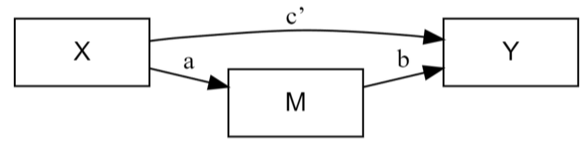

### 中介分析
中介分析主要涉及三个模型
- 1. Y = cX + e1
- 2. M = aX +e2
- 3. Y = c'X + bM + e3 = c'X + b(aX + e2) + e3

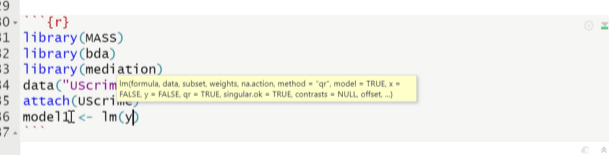

In [7]:
library(MASS)
library(bda)
library(mediation)
data('UScrime')
attach(UScrime)


Loading required package: boot

bda - 18.3.2

Loading required package: Matrix

Loading required package: mvtnorm

Loading required package: sandwich

mediation: Causal Mediation Analysis
Version: 4.5.1




In [6]:
# install.packages("mediation")
# install.packages("bda")

第一个模型
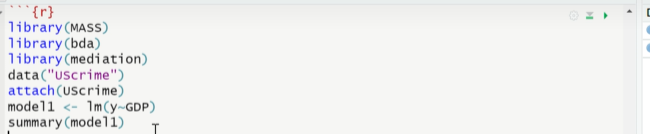

In [9]:
head(UScrime)

,M,So,Ed,Po1,Po2,LF,M.F,Pop,NW,U1,U2,GDP,Ineq,Prob,Time,y
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>
1,151,1,91,58,56,510,950,33,301,108,41,394,261,0.084602,26.2011,791
2,143,0,113,103,95,583,1012,13,102,96,36,557,194,0.029599,25.2999,1635
3,142,1,89,45,44,533,969,18,219,94,33,318,250,0.083401,24.3006,578
4,136,0,121,149,141,577,994,157,80,102,39,673,167,0.015801,29.9012,1969
5,141,0,121,109,101,591,985,18,30,91,20,578,174,0.041399,21.2998,1234
6,121,0,110,118,115,547,964,25,44,84,29,689,126,0.034201,20.9995,682


In [10]:
model1 <- lm(y ~ GDP)
summary(model1)


Call:
lm(formula = y ~ GDP)

Residuals:
    Min      1Q  Median      3Q     Max 
-631.40 -272.84  -46.17  197.25  825.02 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept) -24.2826   286.3139  -0.085   0.9328   
GDP           1.7689     0.5362   3.299   0.0019 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 350.9 on 45 degrees of freedom
Multiple R-squared:  0.1948,	Adjusted R-squared:  0.1769 
F-statistic: 10.88 on 1 and 45 DF,  p-value: 0.001902


第二个模型
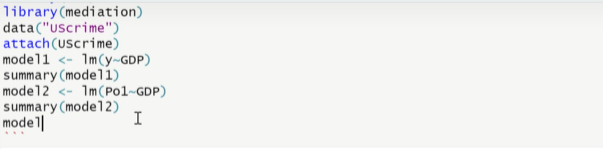

In [11]:
model2 <- lm(Po1 ~ GDP)
summary(model2)


Call:
lm(formula = Po1 ~ GDP)

Residuals:
    Min      1Q  Median      3Q     Max 
-28.667 -12.939   0.697   9.024  53.937 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -42.38617   15.11888  -2.804  0.00743 ** 
GDP           0.24246    0.02831   8.564 5.29e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 18.53 on 45 degrees of freedom
Multiple R-squared:  0.6197,	Adjusted R-squared:  0.6113 
F-statistic: 73.33 on 1 and 45 DF,  p-value: 5.291e-11


第三个模型
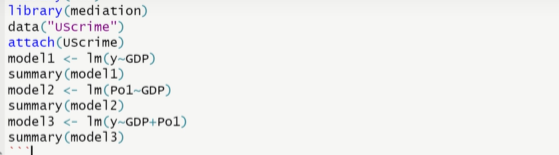

In [13]:
model3 <- lm(y ~ GDP + Po1)
summary(model3)


Call:
lm(formula = y ~ GDP + Po1)

Residuals:
    Min      1Q  Median      3Q     Max 
-687.46 -140.11    3.37  141.37  553.68 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 469.1779   247.5133   1.896   0.0646 .  
GDP          -1.0538     0.6935  -1.520   0.1358    
Po1          11.6420     2.2517   5.170 5.48e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 279.9 on 44 degrees of freedom
Multiple R-squared:  0.4991,	Adjusted R-squared:  0.4763 
F-statistic: 21.92 on 2 and 44 DF,  p-value: 2.482e-07


### 检验
- 1方法 不常用要求符合正态分布

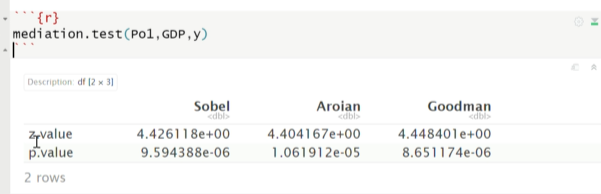

第二个常用
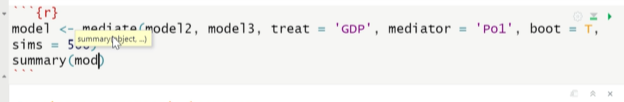
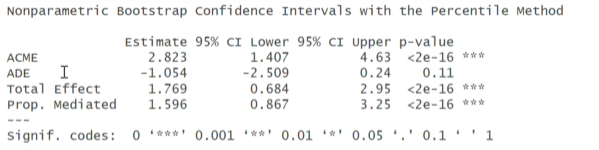

In [16]:
model <- mediate(model2, model3, treat = "GDP", mediator = "Po1", boot = TRUE, sims = 500)
summary(model)

Running nonparametric bootstrap





Causal Mediation Analysis 

Nonparametric Bootstrap Confidence Intervals with the Percentile Method

                Estimate 95% CI Lower 95% CI Upper p-value    
ACME            2.822763     1.428156     4.454951  <2e-16 ***
ADE            -1.053830    -2.495521     0.068067   0.064 .  
Total Effect    1.768934     0.731769     2.888317  <2e-16 ***
Prop. Mediated  1.595743     0.965040     3.307700  <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Sample Size Used: 47 


Simulations: 500 


### 小结|

In [24]:
print("###############  model1 Y~X  c'  ##################")
summary(model1)
print("###############  model2 M~X  a   ##################")
summary(model2)
print("###############  model3 Y~X+M ab  ########################")
summary(model3)
print("###############  model ##################")
summary(model)

[1] "###############  model1 Y~X  c'  ##################"



Call:
lm(formula = y ~ GDP)

Residuals:
    Min      1Q  Median      3Q     Max 
-631.40 -272.84  -46.17  197.25  825.02 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept) -24.2826   286.3139  -0.085   0.9328   
GDP           1.7689     0.5362   3.299   0.0019 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 350.9 on 45 degrees of freedom
Multiple R-squared:  0.1948,	Adjusted R-squared:  0.1769 
F-statistic: 10.88 on 1 and 45 DF,  p-value: 0.001902


[1] "###############  model2 M~X  a   ##################"



Call:
lm(formula = Po1 ~ GDP)

Residuals:
    Min      1Q  Median      3Q     Max 
-28.667 -12.939   0.697   9.024  53.937 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -42.38617   15.11888  -2.804  0.00743 ** 
GDP           0.24246    0.02831   8.564 5.29e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 18.53 on 45 degrees of freedom
Multiple R-squared:  0.6197,	Adjusted R-squared:  0.6113 
F-statistic: 73.33 on 1 and 45 DF,  p-value: 5.291e-11


[1] "###############  model3 Y~X+M ab  ########################"



Call:
lm(formula = y ~ GDP + Po1)

Residuals:
    Min      1Q  Median      3Q     Max 
-687.46 -140.11    3.37  141.37  553.68 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 469.1779   247.5133   1.896   0.0646 .  
GDP          -1.0538     0.6935  -1.520   0.1358    
Po1          11.6420     2.2517   5.170 5.48e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 279.9 on 44 degrees of freedom
Multiple R-squared:  0.4991,	Adjusted R-squared:  0.4763 
F-statistic: 21.92 on 2 and 44 DF,  p-value: 2.482e-07


[1] "###############  model ##################"



Causal Mediation Analysis 

Nonparametric Bootstrap Confidence Intervals with the Percentile Method

                Estimate 95% CI Lower 95% CI Upper p-value    
ACME            2.822763     1.428156     4.454951  <2e-16 ***
ADE            -1.053830    -2.495521     0.068067   0.064 .  
Total Effect    1.768934     0.731769     2.888317  <2e-16 ***
Prop. Mediated  1.595743     0.965040     3.307700  <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Sample Size Used: 47 


Simulations: 500 


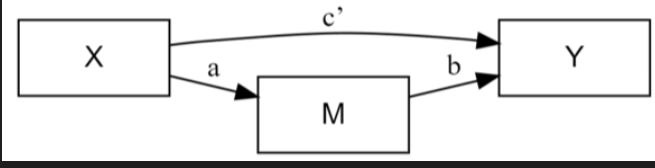
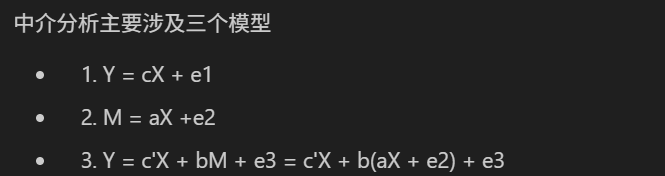
- 1. Y~X 总效应
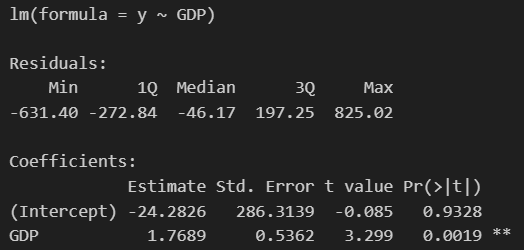
- 2. M~X a效应
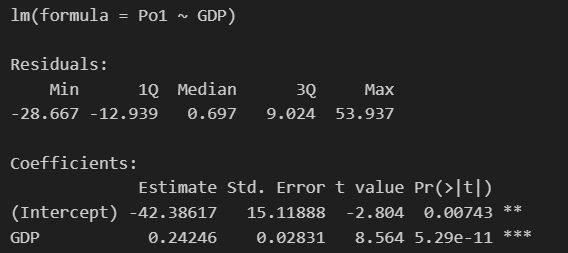
- 3. Y~X+M  c', b效应
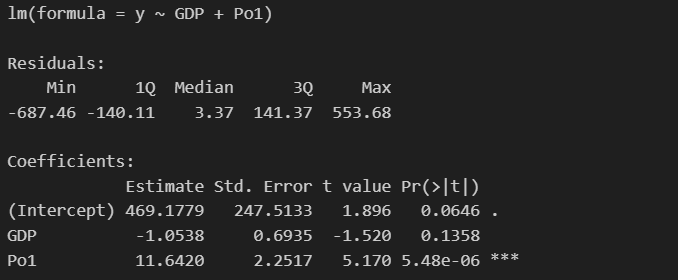
- 4. mediation analysis
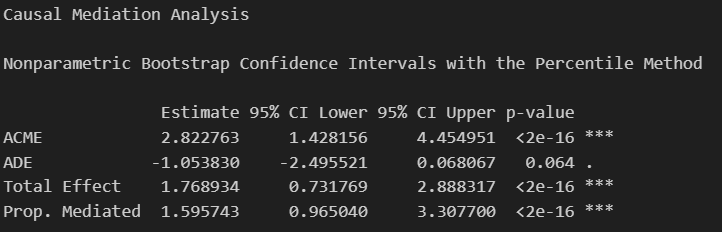